#### [DataSet Download Link](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob
from sklearn.model_selection import train_test_split
from pathlib import Path

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
# Dataset : http://cb.lk/covid_19

!wget http://cb.lk/covid_19

--2020-05-03 15:29:29--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-05-03 15:29:30--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-05-03 15:29:30--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-05-03 15:29:30--  https://www.dropbox.com/s/raw/7

In [4]:
!unzip  covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [5]:

p = Path("CovidDataset/Train/Normal/")
Uninfected = []
images = p.glob('*.jpeg')
for image_path in images:
  img = image.load_img(image_path , target_size = (128,128))
  img = image.img_to_array(img)
  Uninfected.append(img)
print(len(Uninfected))

112


In [6]:
p = Path("CovidDataset/Train/Covid/")
image_to_arr = []
images = p.glob('*.jpg')
for image_path in images:
  img = image.load_img(image_path , target_size = (128,128))
  img = image.img_to_array(img)
  image_to_arr.append(img)

print(len(image_to_arr))

50


In [0]:
infected = np.asarray(image_to_arr) #covid
Uninfected = np.asarray(Uninfected) #normal

In [0]:

# Creating Dataset. Stacking the infected and uninfected
dataset = np.vstack((Uninfected, infected))

In [9]:
infected_label = np.zeros(infected.shape[0])      # giving 0 to covid and 1 to normal
print(infected_label.shape)                       # printing shape
Uninfected_label = np.ones(Uninfected.shape[0])
print(Uninfected_label.shape)

(50,)
(112,)


In [0]:
labels = np.zeros(infected.shape[0]+Uninfected.shape[0])       # Combining Labels
labels[:infected.shape[0]] = infected_label  
labels[infected.shape[0]:] = Uninfected_label

In [11]:
labels.shape

(162,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dataset,labels,test_size=0.1,random_state=42)

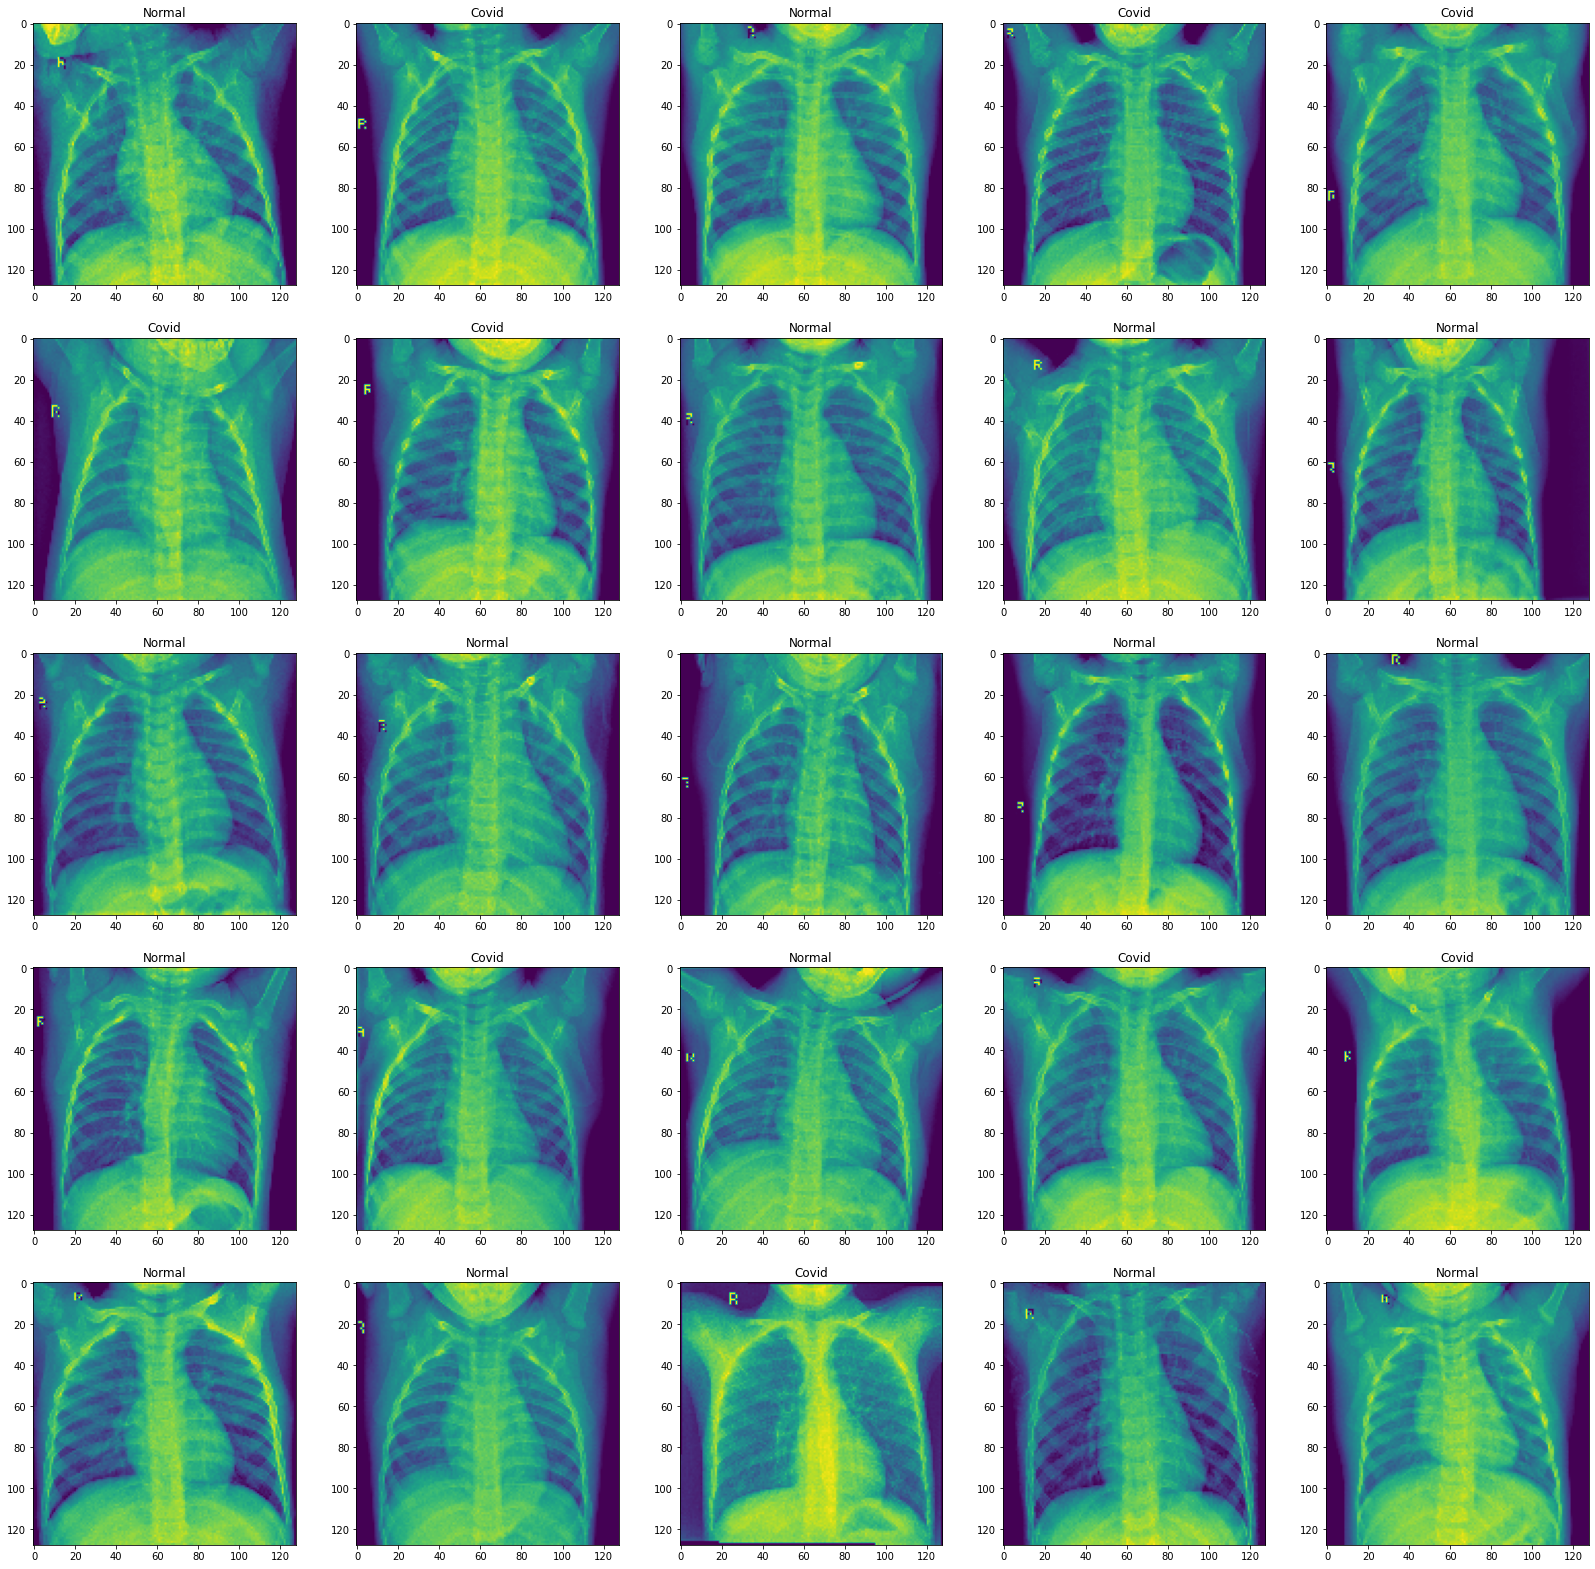

In [13]:
# Plotting XRAY Images
fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    img=dataset[i]
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(img)
    if y_train[i] == 0:
        plt.title('Covid')
    else:
        plt.title('Normal')
    
plt.show()

In [14]:
input_shape = (128,128,3)

# Creating Model
model = Sequential()

model.add(Conv2D(16, kernel_size=3, padding="same", input_shape=input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='relu'))

model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [15]:
hist = model.fit(X_train, y_train,
                shuffle=True,
                batch_size=512,
                 epochs=20,
                 validation_data=(X_test,y_test)
                )

Train on 145 samples, validate on 17 samples
Epoch 1/20
145/145 [==============================] - 2s 13ms/step - loss: 6.1949 - accuracy: 0.6759 - val_loss: 6.7066 - val_accuracy: 0.7059
Epoch 2/20
145/145 [==============================] - 1s 8ms/step - loss: 9.1275 - accuracy: 0.6483 - val_loss: 3.8595 - val_accuracy: 0.7059
Epoch 3/20
145/145 [==============================] - 1s 8ms/step - loss: 5.6873 - accuracy: 0.6759 - val_loss: 2.1618 - val_accuracy: 0.7059
Epoch 4/20
145/145 [==============================] - 1s 8ms/step - loss: 3.7759 - accuracy: 0.6828 - val_loss: 0.9596 - val_accuracy: 0.7059
Epoch 5/20
145/145 [==============================] - 1s 8ms/step - loss: 2.2122 - accuracy: 0.6690 - val_loss: 0.6017 - val_accuracy: 0.7059
Epoch 6/20
145/145 [==============================] - 1s 8ms/step - loss: 2.2351 - accuracy: 0.6690 - val_loss: 0.6100 - val_accuracy: 0.7059
Epoch 7/20
145/145 [==============================] - 1s 8ms/step - loss: 1.7695 - accuracy: 0.6552 - 

In [16]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [0]:
def plot_loss():
    print(hist.history.keys())
    plt.figure()
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()
    
    plt.figure()
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
    plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


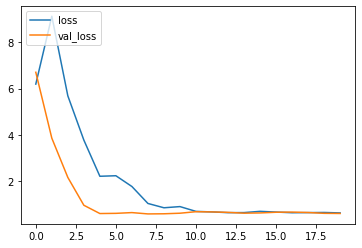

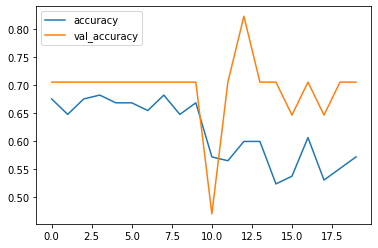

In [18]:
plot_loss()

In [0]:
a=model.predict_classes(dataset[31].reshape((-1,128,128,3)))


In [72]:
print(a)

[[0]]


PREDICTION = Covid+


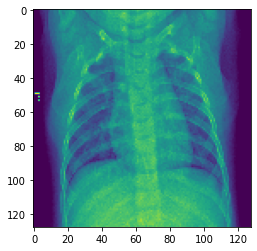

In [73]:
img=dataset[31]
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

if(a==0):
  print("PREDICTION = Covid+")
else:
  print("PREDICTION = Normal")


In [74]:
labels[31]

0.0

[[1]]
PREDICTION = Normal


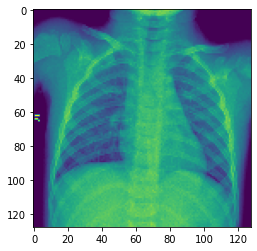

In [77]:
b=model.predict_classes(dataset[0].reshape((-1,128,128,3)))
print(b)
img=dataset[0]
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

if(b==0):
  print("PREDICTION = Covid+")
else:
  print("PREDICTION = Normal")

In [78]:
for i in range (dataset.shape[0]):
  a=model.predict_classes(dataset[i].reshape((-1,128,128,3)))
  print(a,i)

[[1]] 0
[[1]] 1
[[1]] 2
[[1]] 3
[[1]] 4
[[1]] 5
[[1]] 6
[[1]] 7
[[1]] 8
[[1]] 9
[[1]] 10
[[1]] 11
[[1]] 12
[[1]] 13
[[1]] 14
[[1]] 15
[[1]] 16
[[1]] 17
[[1]] 18
[[1]] 19
[[1]] 20
[[1]] 21
[[1]] 22
[[1]] 23
[[1]] 24
[[1]] 25
[[1]] 26
[[1]] 27
[[1]] 28
[[1]] 29
[[1]] 30
[[0]] 31
[[1]] 32
[[1]] 33
[[0]] 34
[[1]] 35
[[1]] 36
[[1]] 37
[[1]] 38
[[1]] 39
[[1]] 40
[[1]] 41
[[1]] 42
[[1]] 43
[[1]] 44
[[1]] 45
[[0]] 46
[[1]] 47
[[1]] 48
[[1]] 49
[[1]] 50
[[1]] 51
[[1]] 52
[[1]] 53
[[0]] 54
[[1]] 55
[[1]] 56
[[1]] 57
[[1]] 58
[[1]] 59
[[1]] 60
[[1]] 61
[[1]] 62
[[1]] 63
[[1]] 64
[[1]] 65
[[1]] 66
[[1]] 67
[[1]] 68
[[1]] 69
[[1]] 70
[[1]] 71
[[1]] 72
[[1]] 73
[[1]] 74
[[1]] 75
[[1]] 76
[[1]] 77
[[1]] 78
[[1]] 79
[[1]] 80
[[1]] 81
[[1]] 82
[[1]] 83
[[1]] 84
[[1]] 85
[[1]] 86
[[1]] 87
[[1]] 88
[[1]] 89
[[1]] 90
[[1]] 91
[[1]] 92
[[1]] 93
[[1]] 94
[[1]] 95
[[1]] 96
[[1]] 97
[[1]] 98
[[1]] 99
[[1]] 100
[[1]] 101
[[0]] 102
[[1]] 103
[[1]] 104
[[1]] 105
[[1]] 106
[[1]] 107
[[1]] 108
[[1]] 109
[[1]] 110


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


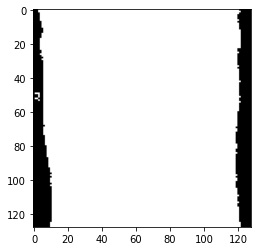

In [81]:
plt.imshow(dataset[31])
plt.imshow(dataset[31])
plt.show()